# Digit Recognizer

In [87]:
#all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
import os

In [51]:
#loading the dataset
train = pd.read_csv(r"C:\\Users\\Prabhat Singh\Desktop\dataset\kaggle3\train.csv")
test =pd.read_csv(r"C:\\Users\\Prabhat Singh\Desktop\dataset\kaggle3\test.csv")

In [52]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
train.shape

(42000, 785)

In [54]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
test.shape

(28000, 784)

In [56]:
y_train = train["label"]
X_train = train.drop(["label"],axis=1)

In [57]:
#missing value
X_train.isnull().sum()
#no missing value

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [58]:
test.isnull().sum()
#no missing value in test

pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
pixel29     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 784, dtype: int64

In [59]:
#Normalization
#divide each pixel by 255
X_train = X_train/255.0
test= test/255.0

In [64]:
#reshaping because we need to add more dimentions
X_train = np.array(X_train).reshape(-1,28,28,1)
test = np.array(test).reshape(-1,28,28,1)

In [67]:
print(X_train.shape)
print(test.shape)

(42000, 28, 28, 1)
(28000, 28, 28, 1)


1


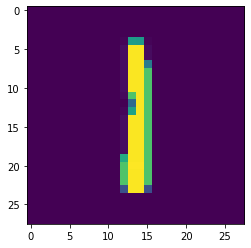

In [77]:
sh=plt.imshow(X_train[2][:,:,0])
print(y_train[2])

In [78]:
#Label Encoding
y_train = to_categorical(y_train,num_classes=10) 

In [92]:
#building model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5),padding="Same", activation="relu",input_shape =(28,28,1)))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3,3),padding="Same", activation="relu"))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
batch_normalization_17 (Batc (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 28, 28, 64)        18496     
_________________________________________________________________
batch_normalization_18 (Batc (None, 28, 28, 64)        256       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 64)       

In [93]:
#Compile
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [95]:
#data augmentation
datagen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                             zca_whitening=False,
                             rotation_range=10,
                             zoom_range = 0.1,
                             width_shift_range=0.1,
                             height_shift_range=0.1,
                             horizontal_flip=False,
                             vertical_flip=False
                            )

datagen.fit(X_train)

In [97]:
#Fit the model
model.fit_generator(datagen.flow(X_train,y_train,batch_size=86,),epochs=30,steps_per_epoch=X_train.shape[0]//86)

Epoch 1/30
488/488 [==============================] - 73s 150ms/step - loss: 0.5058 - accuracy: 0.8866
Epoch 2/30
488/488 [==============================] - 67s 137ms/step - loss: 0.1712 - accuracy: 0.9594
Epoch 3/30
488/488 [==============================] - 68s 139ms/step - loss: 0.1413 - accuracy: 0.9673
Epoch 4/30
488/488 [==============================] - 67s 138ms/step - loss: 0.1220 - accuracy: 0.9724
Epoch 5/30
488/488 [==============================] - 96s 196ms/step - loss: 0.1111 - accuracy: 0.9756
Epoch 6/30
488/488 [==============================] - 68s 140ms/step - loss: 0.0997 - accuracy: 0.9787
Epoch 7/30
488/488 [==============================] - 70s 143ms/step - loss: 0.0973 - accuracy: 0.9795
Epoch 8/30
488/488 [==============================] - 67s 138ms/step - loss: 0.0891 - accuracy: 0.9811
Epoch 9/30
488/488 [==============================] - 68s 140ms/step - loss: 0.0909 - accuracy: 0.9812
Epoch 10/30
488/488 [==============================] - 69s 142ms/step - l

In [98]:
#predicting the values
pred = model.predict(test)
final_pred = np.argmax(pred,axis=1)

In [101]:
sample_sub= pd.read_csv(r"C:\\Users\\Prabhat Singh\Desktop\dataset\kaggle3\sample_submission.csv")

In [102]:
sample_sub.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [103]:
sample_sub = pd.DataFrame({"ImageId": list(range(1,len(final_pred)+1)),
                          "Label": final_pred})
sample_sub.to_csv("Cnn_handr.csv",index= False)
sample_sub.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
